# Imports



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

# original_data = pd.read_csv('data.csv')
# dataset with all the preprocessing
df = pd.read_csv('data_preprocessed.csv')

# the imported data is already preprocessed, so no need to do it again.
# df.replace(9, np.nan, inplace=True)

# print("before removing Nan", df.shape)
# df.dropna(inplace=True)
# print("after removing Nan", df.shape)

# # converting price in lakhs
# df['Price'] = df['Price']/100000

# Overview

In [ ]:
df.columns

Index(['Unnamed: 0', 'Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'ShoppingMall', 'ATM', 'School', 'Hospital', 'VaastuCompliant', 'City',
       'Amenities', 'Furnitioned', 'Capacity(no. of people)'],
      dtype='object')

In [43]:
original_data.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,Delhi
1,1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi
2,2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Delhi
3,3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Delhi
4,4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Delhi


In [ ]:
df.head()

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,Resale,ShoppingMall,ATM,School,Hospital,VaastuCompliant,City,Amenities,Furnitioned,Capacity(no. of people)
0,0,105.0,1200,Sector 10 Dwarka,2.0,1,0.0,0.0,0.0,0.0,1.0,Delhi,1,1,4.0
1,1,60.0,1000,Uttam Nagar,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0
2,2,150.0,1350,Sarita Vihar,2.0,1,0.0,0.0,0.0,0.0,0.0,Delhi,0,0,4.0
3,3,25.0,435,Uttam Nagar,2.0,0,0.0,0.0,0.0,0.0,1.0,Delhi,1,0,4.0
4,4,58.0,900,Dwarka Mor,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0


In [ ]:
df['City'].value_counts()

Hyderabad    2434
Chennai      2233
Delhi        2001
Bangalore    1951
Mumbai       1398
Kolkata        75
Name: City, dtype: int64

# feature generation

the orignal dataset have too many unnecessay feature, so we need to generate new features using this old features

In [ ]:
# tmpdf = df.copy()

In [ ]:
# # facilities 
# # psycometric segment
# amenities = ['MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
#             'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 
#             'Intercom', 'SportsFacility', 'ClubHouse','24X7Security', 'PowerBackup', 
#              'CarParking', 'StaffQuarter','Cafeteria', 'MultipurposeRoom', 'Children\'splayarea', 'LiftAvailable']

# furnitioned = ['BED', 'Microwave', 'TV', 'DiningTable', 'Sofa', 'Refrigerator', 'AC', 'WashingMachine', 'Gasconnection']

In [ ]:
# df['Amenities'] = 0;
# for i in amenities:
#   df['Amenities'] += df[i]

# df['Amenities'] =  np.where(df['Amenities'] >= 1, 1, 0)

In [ ]:
# df.drop(columns=amenities, axis=1, inplace=True)

In [ ]:
# df['Furnitioned'] = 0
# for i in furnitioned:
#   df['Furnitioned'] += df[i]

# df['Furnitioned'] = np.where(df['Furnitioned']>=1, 1, 0)

# df.drop(columns=furnitioned, axis=1, inplace=True)

In [ ]:
# df['Capacity(no. of people)'] = df['No. of Bedrooms'] * 2

In [ ]:
# df.to_csv('/content/drive/MyDrive/Colab Notebooks/real_estate_market/data_preprocessed.csv')

# EDA

### City 

In [46]:
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,ShoppingMall,ATM,School,Hospital,VaastuCompliant,City,Amenities,Furnitioned,Capacity(no. of people)
0,105.0,1200,Sector 10 Dwarka,2.0,1,0.0,0.0,0.0,0.0,1.0,Delhi,1,1,4.0
1,60.0,1000,Uttam Nagar,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0
2,150.0,1350,Sarita Vihar,2.0,1,0.0,0.0,0.0,0.0,0.0,Delhi,0,0,4.0
3,25.0,435,Uttam Nagar,2.0,0,0.0,0.0,0.0,0.0,1.0,Delhi,1,0,4.0
4,58.0,900,Dwarka Mor,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0


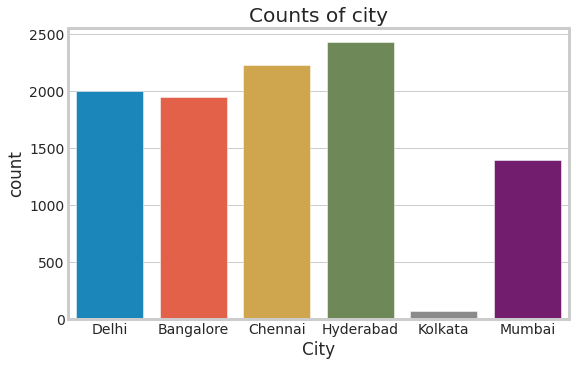

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(df['City'])
plt.title('Counts of city')
plt.show()

In [48]:
df['City'].value_counts().sort_values(ascending=False)

Hyderabad    2434
Chennai      2233
Delhi        2001
Bangalore    1951
Mumbai       1398
Kolkata        75
Name: City, dtype: int64

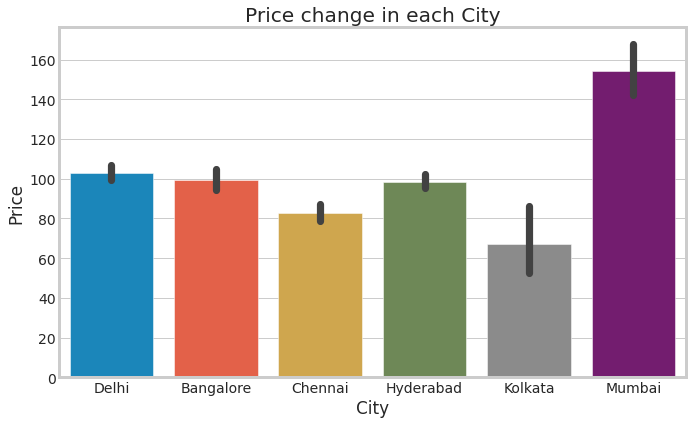

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'])
plt.title('Price change in each City')
plt.show()

In [ ]:
len(df['Location'].unique())

849

### Frequncy of each location in city [top 10]

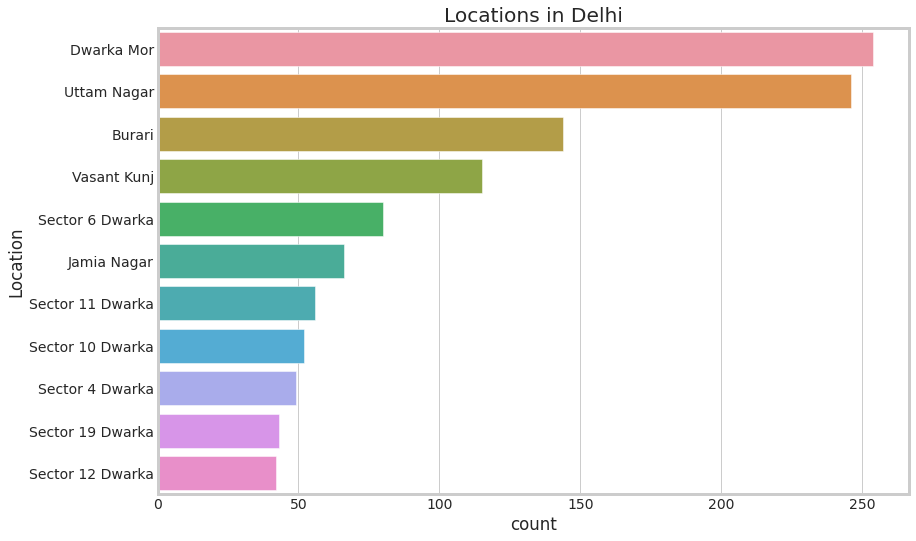

In [66]:
tmpdf = df[df['City'] == 'Delhi']
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=tmpdf, order=tmpdf['Location'].value_counts().index[:11])
plt.title('Locations in Delhi')
plt.show()

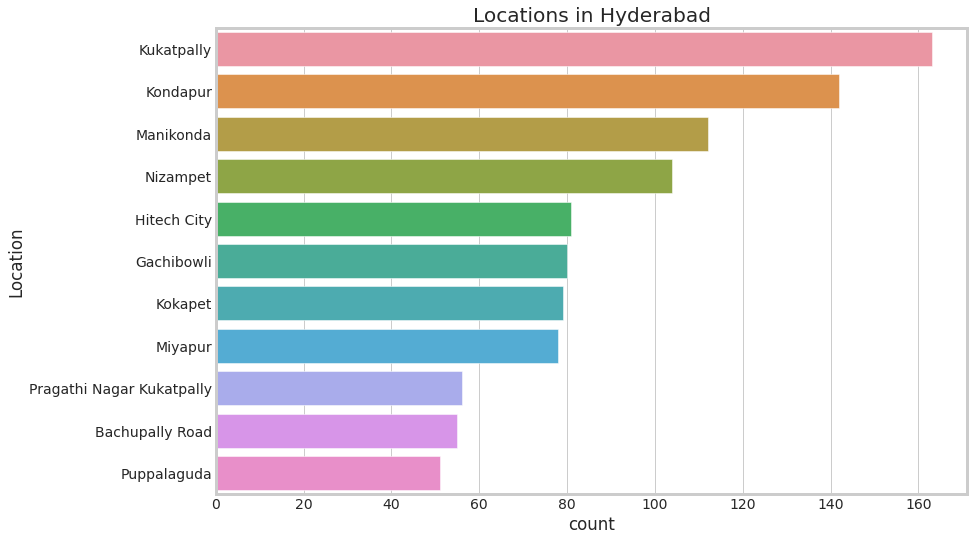

In [67]:
tmpdf = df[df['City'] == 'Hyderabad']
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=tmpdf, order=tmpdf['Location'].value_counts().index[:11])
plt.title('Locations in Hyderabad')
plt.show()

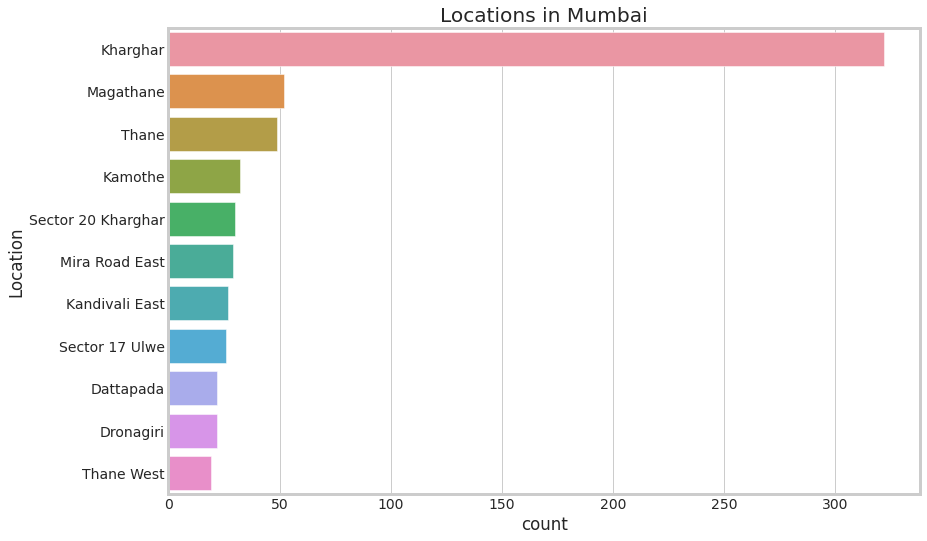

In [68]:
tmpdf = df[df['City'] == 'Mumbai']
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=tmpdf, order=tmpdf['Location'].value_counts().index[:11])
plt.title('Locations in Mumbai')
plt.show()

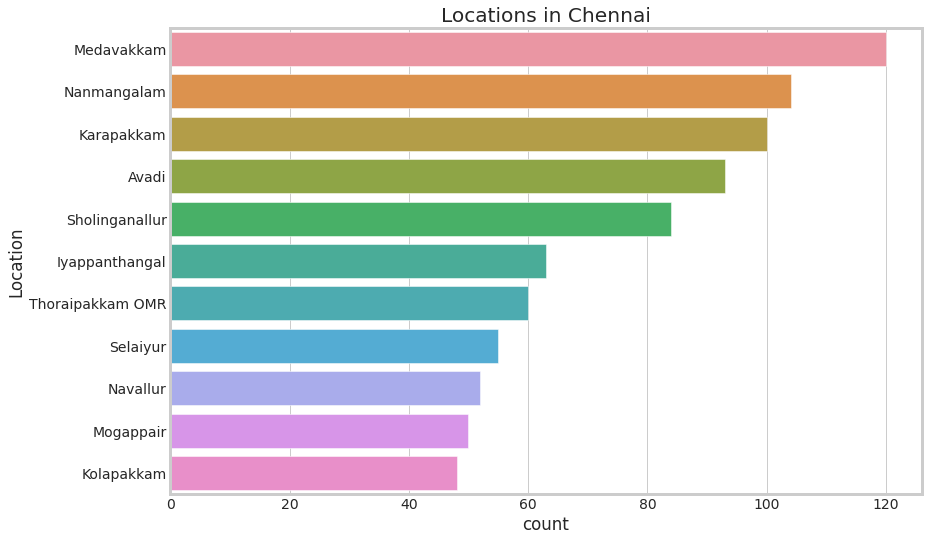

In [69]:
tmpdf = df[df['City'] == 'Chennai']
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=tmpdf, order=tmpdf['Location'].value_counts().index[:11])
plt.title('Locations in Chennai')
plt.show()

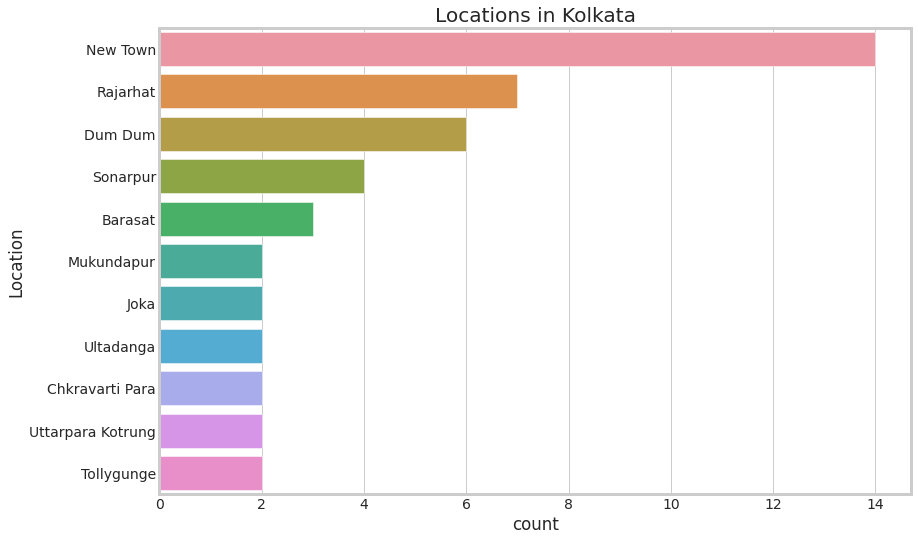

In [70]:
tmpdf = df[df['City'] == 'Kolkata']
plt.figure(figsize=(12, 8))
sns.countplot(y='Location', data=tmpdf, order=tmpdf['Location'].value_counts().index[:11])
plt.title('Locations in Kolkata')
plt.show()

### Resale

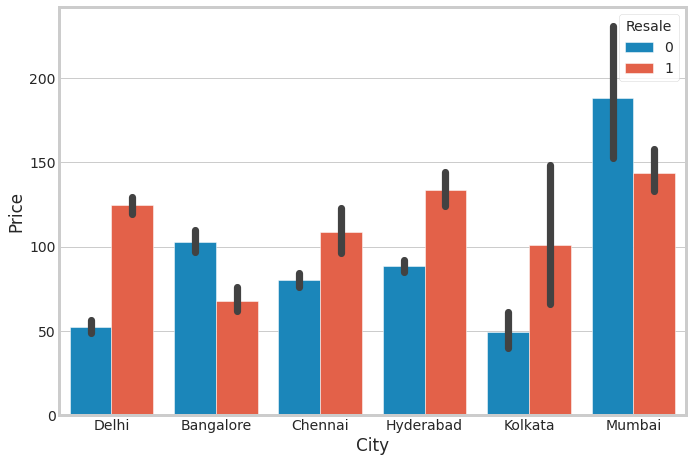

In [55]:
plt.figure(figsize=(10, 7))
sns.barplot(df['City'], df['Price'], hue=df['Resale'])
plt.show()

### No. of Bedrooms

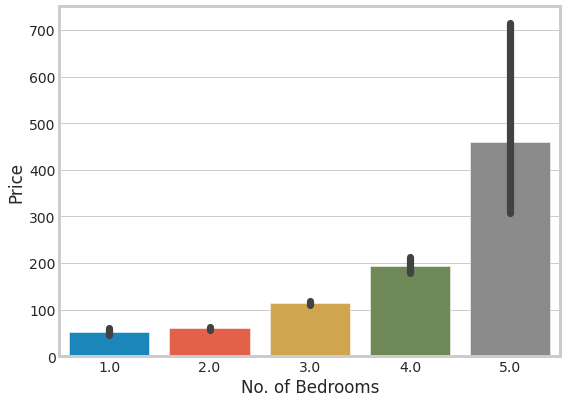

In [56]:
tmpdf = df[df['City'] == 'Delhi']
plt.figure(figsize=(8, 6))
sns.barplot(x='No. of Bedrooms', y='Price', data=tmpdf)
plt.show()

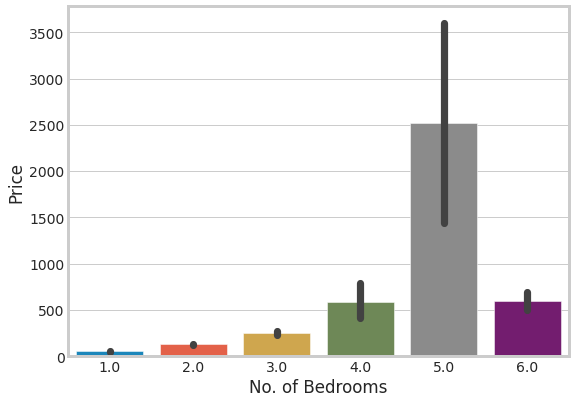

In [57]:
tmpdf = df[df['City'] == 'Mumbai']
plt.figure(figsize=(8, 6))
sns.barplot(x='No. of Bedrooms', y='Price', data=tmpdf)
plt.show()

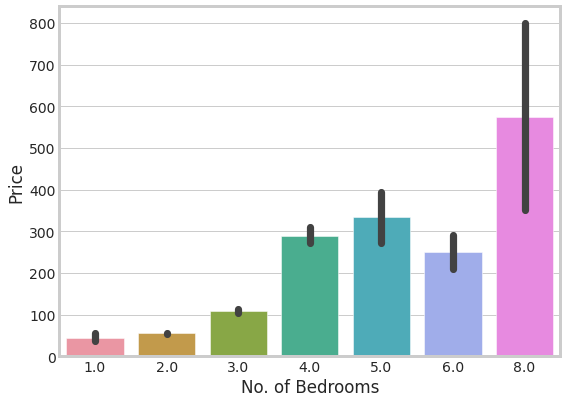

In [58]:
tmpdf = df[df['City'] == 'Hyderabad']
plt.figure(figsize=(8, 6))
sns.barplot(x='No. of Bedrooms', y='Price', data=tmpdf)
plt.show()

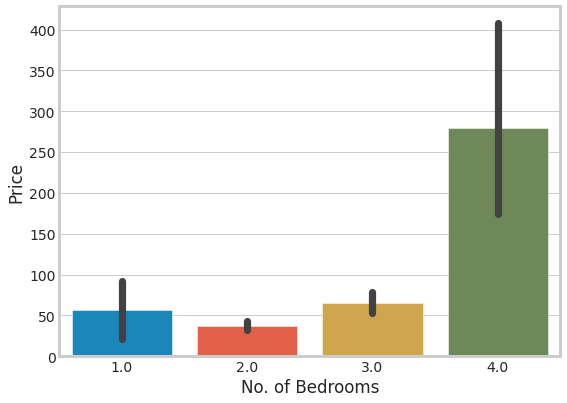

In [59]:
tmpdf = df[df['City'] == 'Kolkata']
plt.figure(figsize=(8, 6))
sns.barplot(x='No. of Bedrooms', y='Price', data=tmpdf)
plt.show()

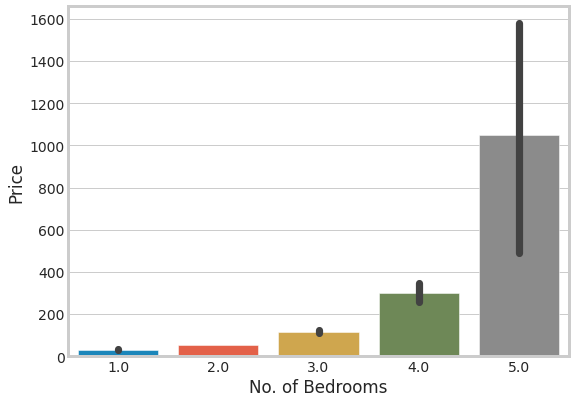

In [60]:
tmpdf = df[df['City'] == 'Chennai']
plt.figure(figsize=(8, 6))
sns.barplot(x='No. of Bedrooms', y='Price', data=tmpdf)
plt.show()

### Amenities [Frequncy]

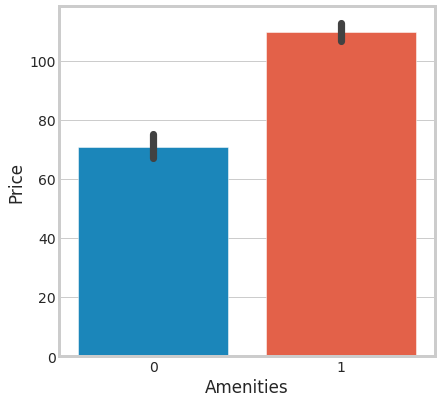

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(df['Amenities'], df['Price'])
plt.show()

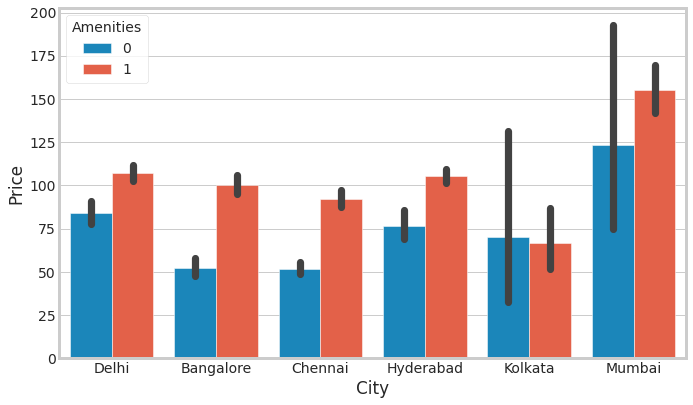

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'], hue=df['Amenities'])
plt.show()

### Furnitioned

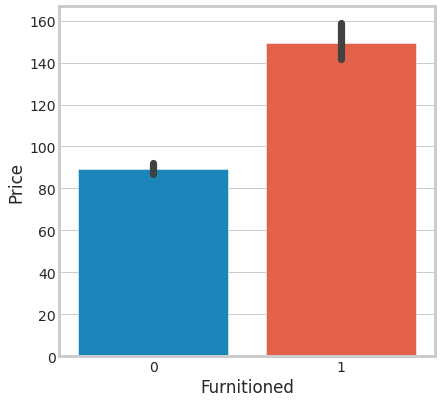

In [61]:
plt.figure(figsize=(6, 6))
sns.barplot(df['Furnitioned'], df['Price'])
plt.show()

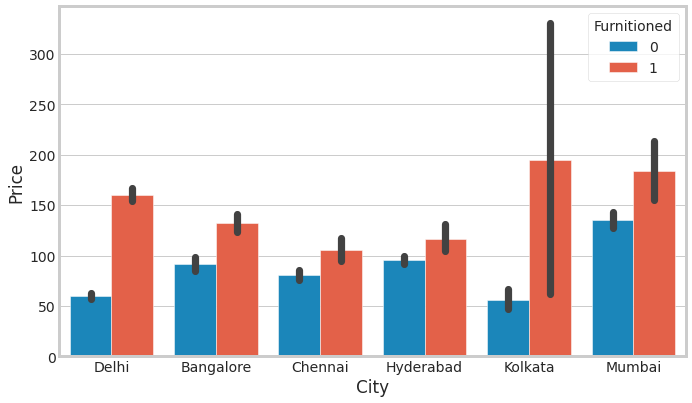

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'], hue=df['Furnitioned'])
plt.show()

### Shopping

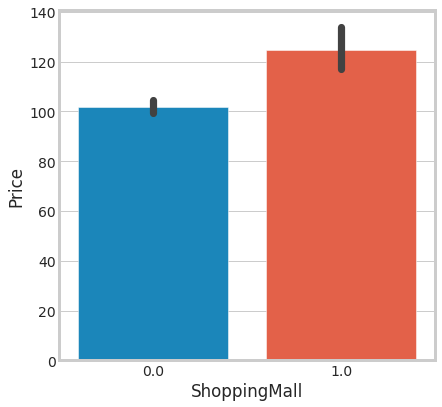

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(df['ShoppingMall'], df['Price'])
plt.show()

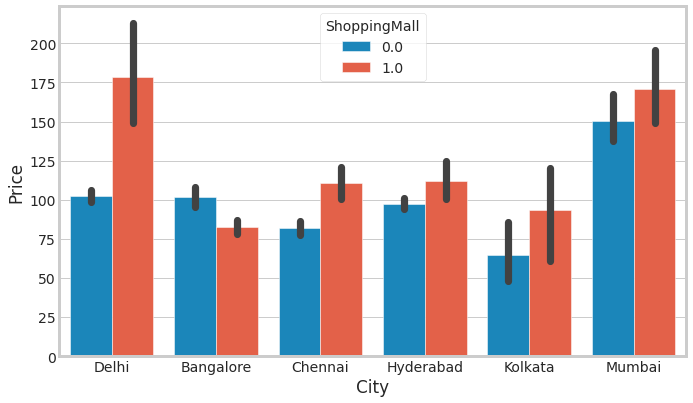

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'], hue=df['ShoppingMall'])
plt.show()

### School

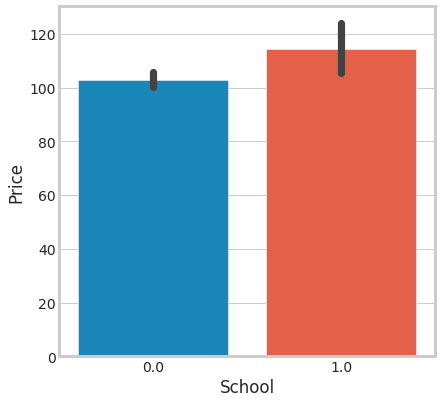

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(df['School'], df['Price'])
plt.show()

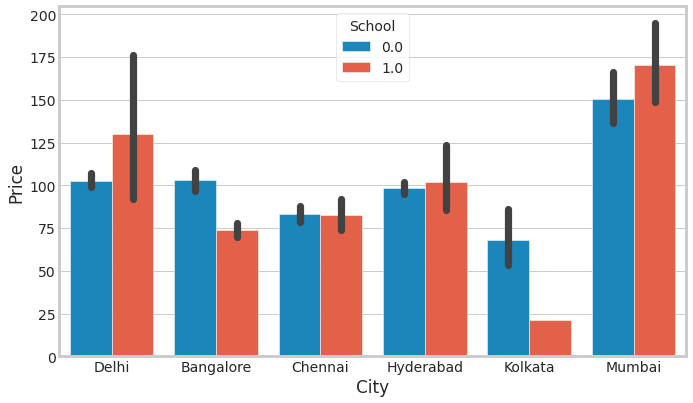

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'], hue=df['School'])
plt.show()

### Hospital

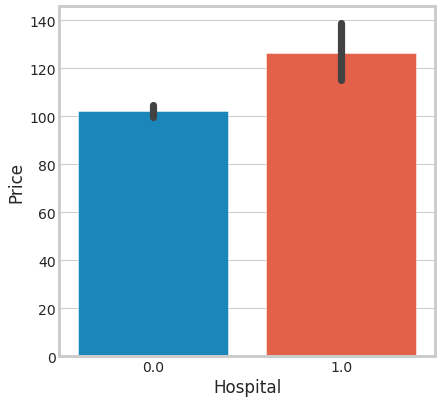

In [ ]:
plt.figure(figsize=(6, 6))
sns.barplot(df['Hospital'], df['Price'])
plt.show()

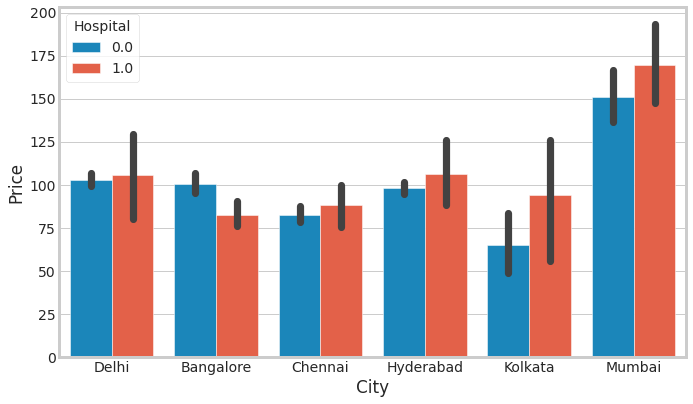

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'], hue=df['Hospital'])
plt.show()

# Data Preprocessing

In [ ]:
# savedf = df.copy()
# tmpdf = df.drop(columns=['Location', 'City'], axis=1)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scalar = StandardScaler()

# tmpdf = pd.DataFrame(columns=tmpdf.columns, data=scalar.fit_transform(tmpdf))

In [ ]:
# tmpdf.head()

,Price,Area,No. of Bedrooms,Resale,ShoppingMall,ATM,School,Hospital,VaastuCompliant,Amenities,Furnitioned,Capacity(no. of people)
0,0.010078,-0.210550,-0.605067,1.385691,-0.28375,-0.335494,-0.280886,-0.245574,1.534982,0.424840,1.796636,-0.605067
1,-0.320785,-0.493093,0.711237,-0.721662,-0.28375,-0.335494,-0.280886,-0.245574,-0.651474,0.424840,-0.556596,0.711237
2,0.340941,0.001357,-0.605067,1.385691,-0.28375,-0.335494,-0.280886,-0.245574,-0.651474,-2.353828,-0.556596,-0.605067
3,-0.578123,-1.291277,-0.605067,-0.721662,-0.28375,-0.335494,-0.280886,-0.245574,1.534982,0.424840,-0.556596,-0.605067
4,-0.335490,-0.634365,0.711237,-0.721662,-0.28375,-0.335494,-0.280886,-0.245574,-0.651474,0.424840,-0.556596,0.711237


# DIMENSIONALITY REDUCTION

In [ ]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=3)
# x = pca.fit_transform(tmpdf)
# pca.explained_variance_ratio_ # percentage of variance captured by each principal component

array([0.27411347, 0.2505985 , 0.1157222 ])

In [ ]:
# pca_df = pd.DataFrame(data=x, columns=['col1', 'col2', 'col3'])

In [ ]:
# pca_df.head()

,col1,col2,col3
0,-0.184845,-0.224792,2.344816
1,-0.452608,0.624593,-0.896430
2,-1.233896,-0.122358,0.204278
3,-0.850030,-1.177262,-0.596310
4,-0.497122,0.561138,-0.889031


In [ ]:
# pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,10092.0,8.433768e-16,1.813750,-2.649304,-1.142479,-0.415207,0.422642,11.187173
col2,10092.0,1.601914e-15,1.734209,-6.545512,-0.742994,-0.276147,1.019995,14.318667
col3,10092.0,8.493888e-17,1.178475,-3.224659,-0.924214,-0.510820,0.797480,5.541214


# CLUSTERING

In [ ]:
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn.cluster import KMeans
# from sklearn.cluster import AgglomerativeClustering

Elbow Method to determine the number of clusters to be formed:


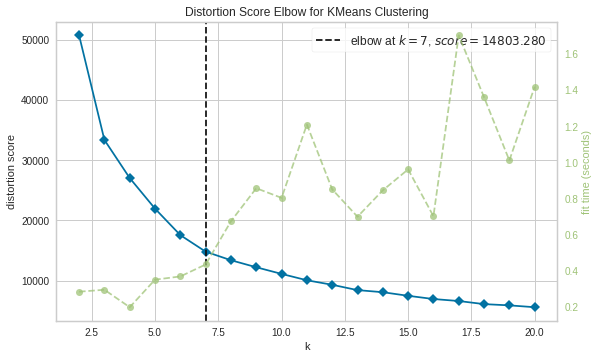

In [ ]:
# # Quick examination of elbow method to find numbers of clusters to make.
# print('Elbow Method to determine the number of clusters to be formed:')
# Elbow_M = KElbowVisualizer(KMeans(), k=20)
# Elbow_M.fit(pca_df)
# Elbow_M.show()

#### According to elbow curve, optimal no. of clusters should be 7, but for simplicity we will take 5 clusters


In [ ]:
# cluster_obj = AgglomerativeClustering(n_clusters=5)
# y_pred = cluster_obj.fit_predict(pca_df)
# df['clusters'] = y_pred
# pca_df['clusters'] = y_pred

In [ ]:
# df.head()

,Price,Area,Location,No. of Bedrooms,Resale,ShoppingMall,ATM,School,Hospital,VaastuCompliant,City,Amenities,Furnitioned,Capacity(no. of people),clusters
0,105.0,1200,Sector 10 Dwarka,2.0,1,0.0,0.0,0.0,0.0,1.0,Delhi,1,1,4.0,0
1,60.0,1000,Uttam Nagar,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0,1
2,150.0,1350,Sarita Vihar,2.0,1,0.0,0.0,0.0,0.0,0.0,Delhi,0,0,4.0,0
3,25.0,435,Uttam Nagar,2.0,0,0.0,0.0,0.0,0.0,1.0,Delhi,1,0,4.0,0
4,58.0,900,Dwarka Mor,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0,1


In [ ]:
# df.to_csv('clustred_data.csv')

# Segment profiling


In [64]:
df = pd.read_csv('clustred_data.csv')

In [4]:
# df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,ShoppingMall,ATM,School,Hospital,VaastuCompliant,City,Amenities,Furnitioned,Capacity(no. of people),clusters
0,105.0,1200,Sector 10 Dwarka,2.0,1,0.0,0.0,0.0,0.0,1.0,Delhi,1,1,4.0,0
1,60.0,1000,Uttam Nagar,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0,1
2,150.0,1350,Sarita Vihar,2.0,1,0.0,0.0,0.0,0.0,0.0,Delhi,0,0,4.0,0
3,25.0,435,Uttam Nagar,2.0,0,0.0,0.0,0.0,0.0,1.0,Delhi,1,0,4.0,0
4,58.0,900,Dwarka Mor,3.0,0,0.0,0.0,0.0,0.0,0.0,Delhi,1,0,6.0,1


In [5]:
df['clusters'].value_counts().sort_values(ascending=False)

0    4793
1    2549
2    1877
3     515
4     358
Name: clusters, dtype: int64

In [8]:
city = df['City'].unique()

## Price


In [10]:
  for i in range(0, 5):
    print(f"the average price of obeservation in {i+1} cluster is = ", df[df['clusters'] == i]['Price'].mean())

the average price of obeservation in 1 cluster is =  58.6557810682243
the average price of obeservation in 2 cluster is =  90.02948166339745
the average price of obeservation in 3 cluster is =  162.4075224240811
the average price of obeservation in 4 cluster is =  131.13586372815533
the average price of obeservation in 5 cluster is =  454.8351951396647


## City

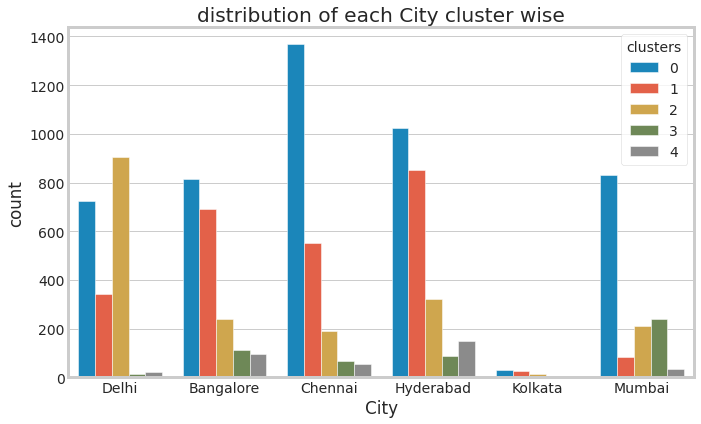

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(df['City'], hue=df['clusters'])
plt.title('distribution of each City cluster wise')
plt.show()

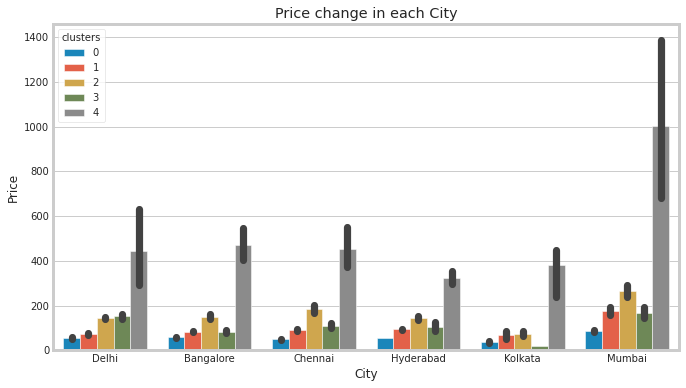

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(df['City'], df['Price'], hue=df['clusters'])
plt.title('Price change in each City')
plt.show()

## Area

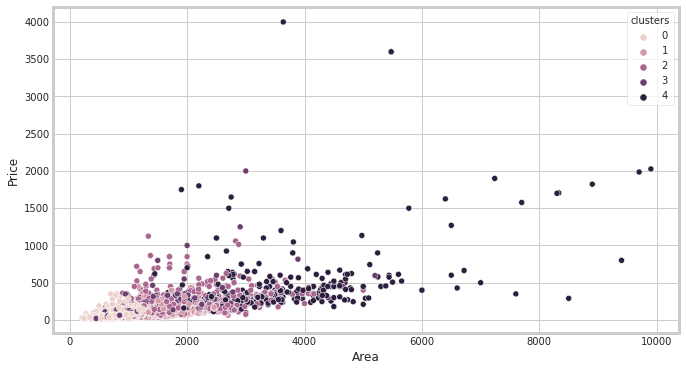

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Area'], y=df['Price'], hue=df['clusters'])
plt.show()

## Resale

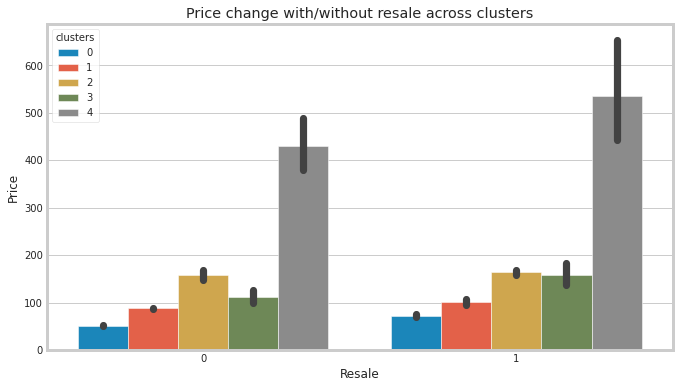

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(df['Resale'], df['Price'], hue=df['clusters'])
plt.title('Price change with/without resale across clusters')
plt.show()

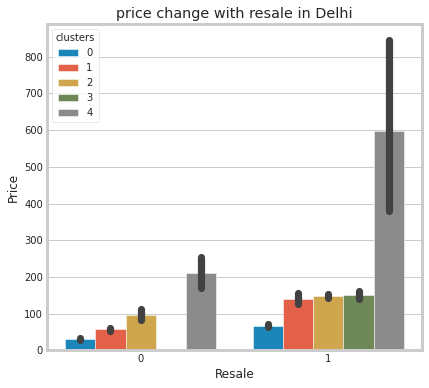

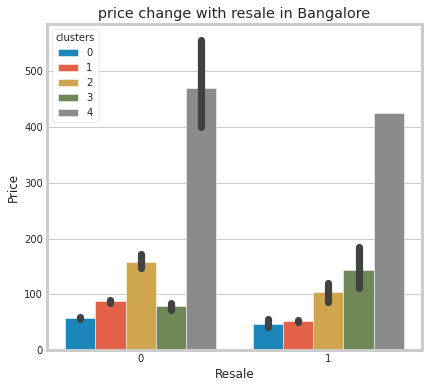

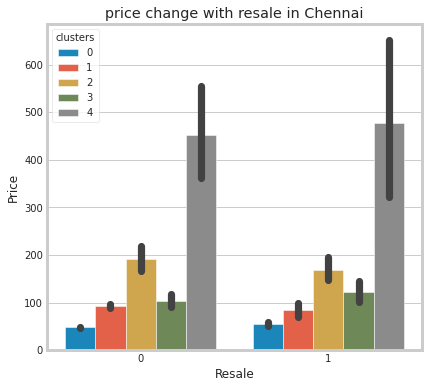

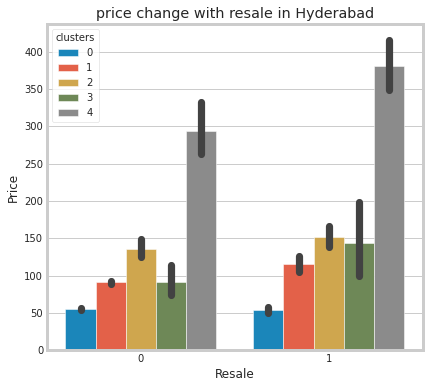

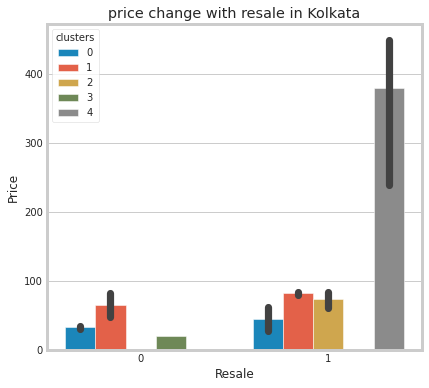

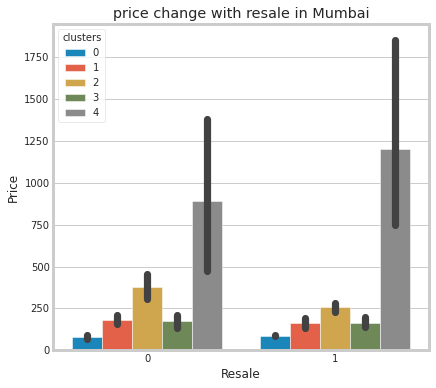

In [30]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='Resale', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with resale in {i}")
  plt.show()

## No. of bedrooms

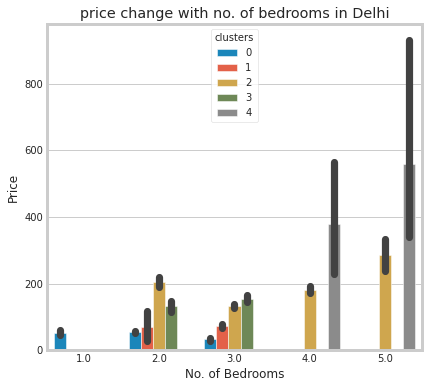

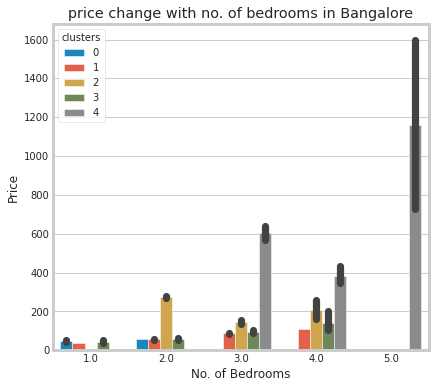

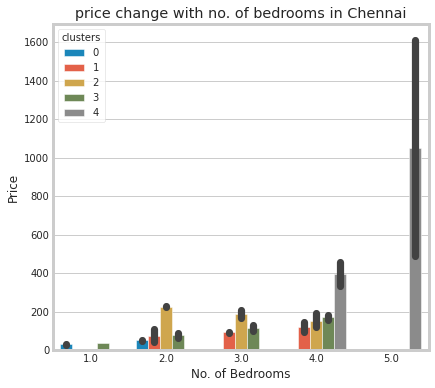

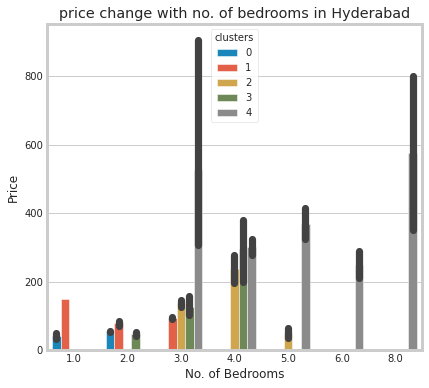

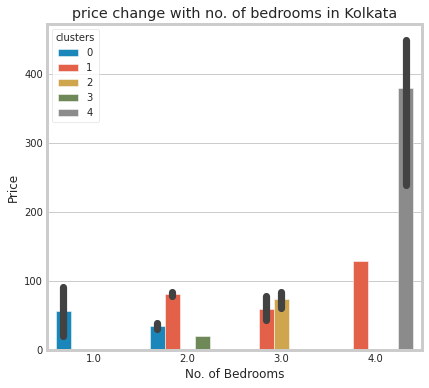

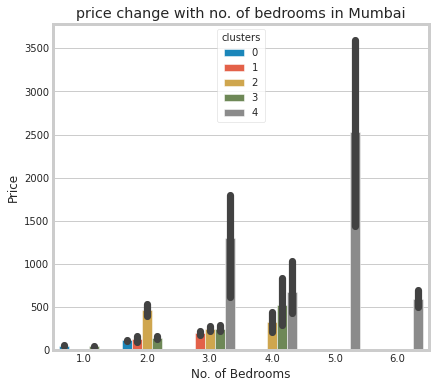

In [27]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='No. of Bedrooms', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with no. of bedrooms in {i}")
  plt.show()

## Shopping Mall

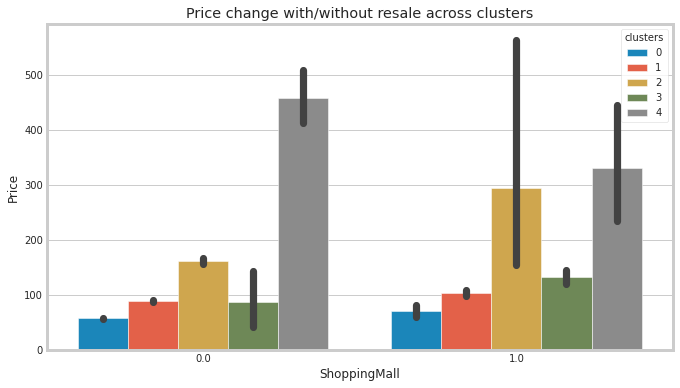

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(df['ShoppingMall'], df['Price'], hue=df['clusters'])
plt.title('Price change with/without resale across clusters')
plt.show()

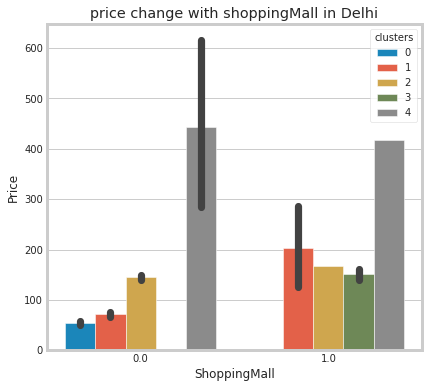

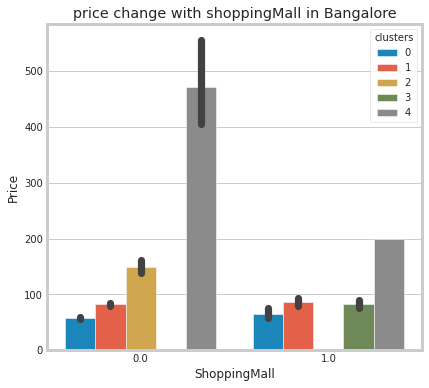

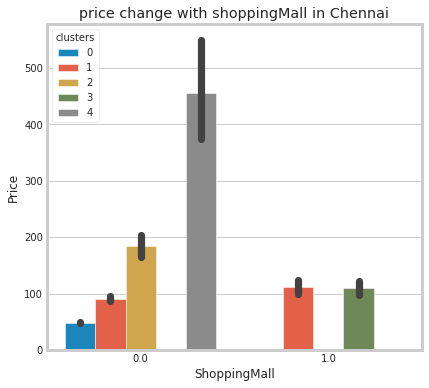

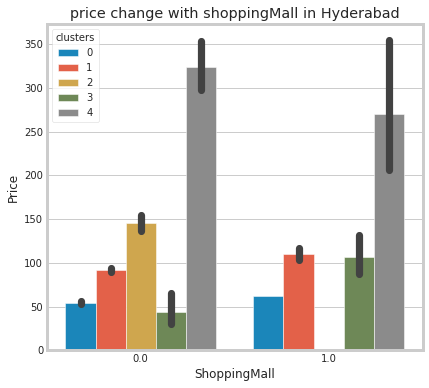

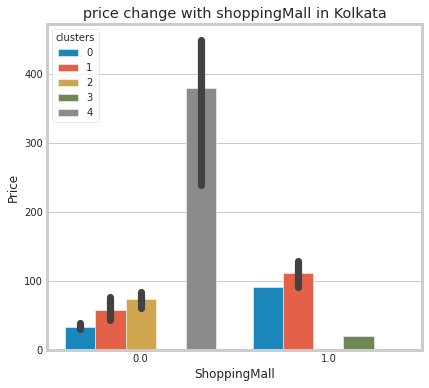

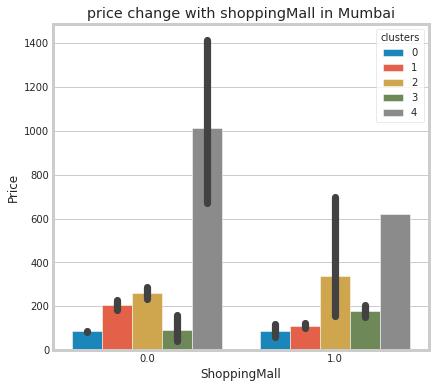

In [31]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='ShoppingMall', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with shoppingMall in {i}")
  plt.show()

## school

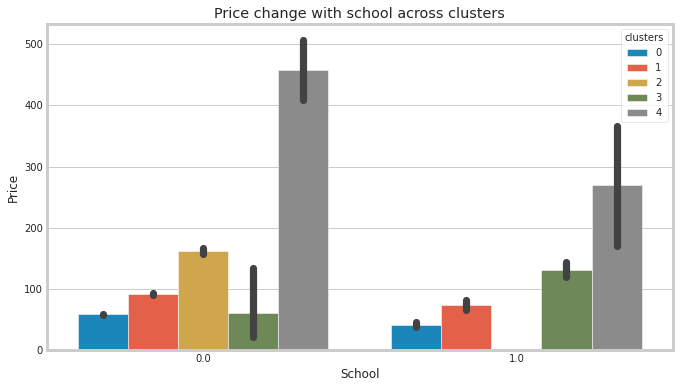

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(df['School'], df['Price'], hue=df['clusters'])
plt.title('Price change with school across clusters')
plt.show()

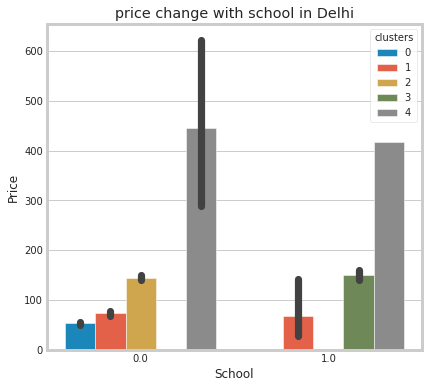

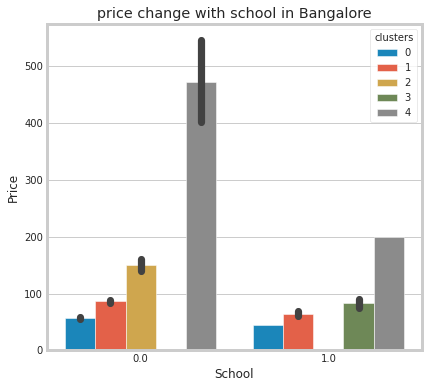

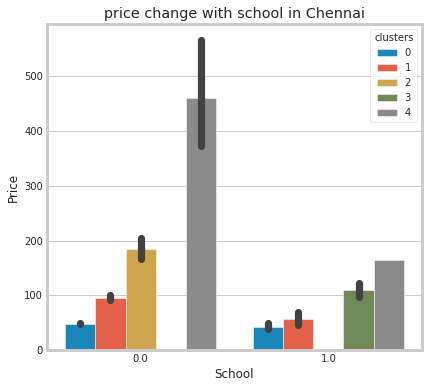

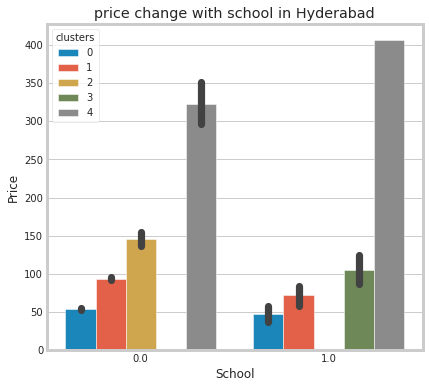

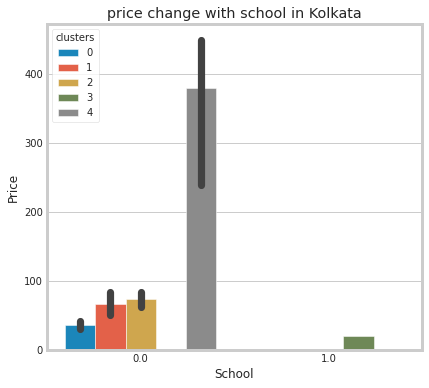

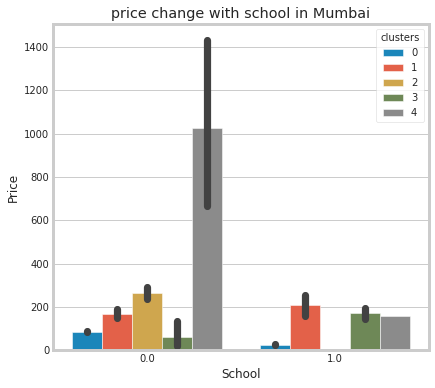

In [35]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='School', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with school in {i}")
  plt.show()

## Hospital

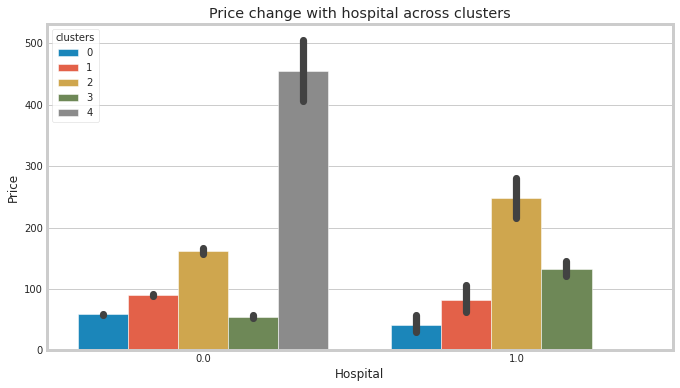

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(df['Hospital'], df['Price'], hue=df['clusters'])
plt.title('Price change with hospital across clusters')
plt.show()

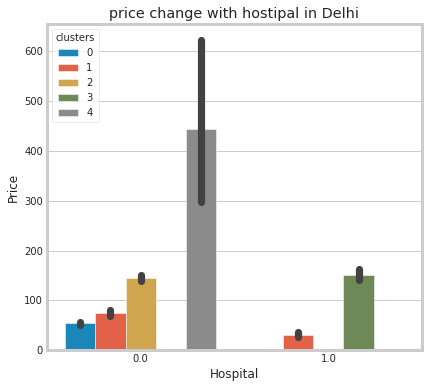

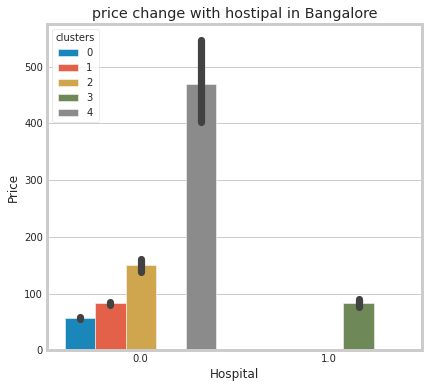

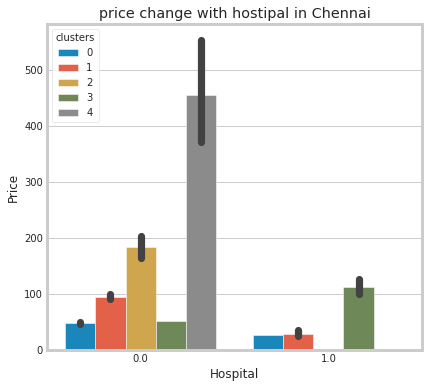

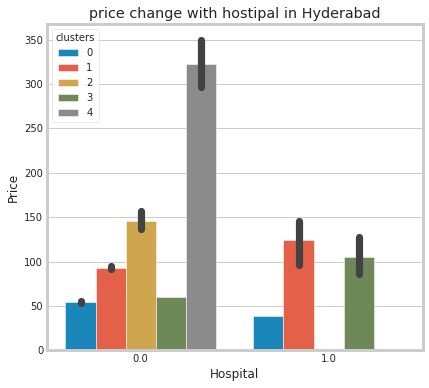

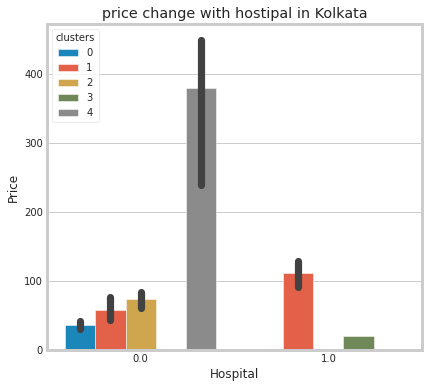

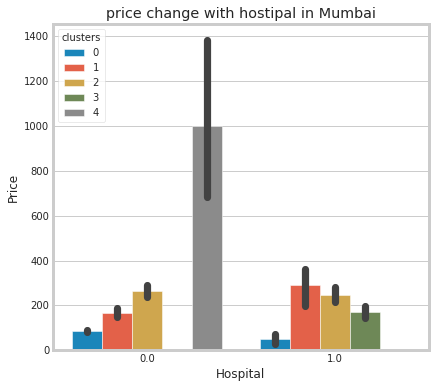

In [37]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='Hospital', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with hostipal in {i}")
  plt.show()

## ATM

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(df['ATM'], df['Price'], hue=df['clusters'])
plt.title('Price change with ATM across clusters')
plt.show()

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'ShoppingMall', 'ATM', 'School', 'Hospital', 'VaastuCompliant', 'City',
       'Amenities', 'Furnitioned', 'Capacity(no. of people)', 'clusters'],
      dtype='object')

In [ ]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='ATM', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with ATM in {i}")
  plt.show()

## Amenities

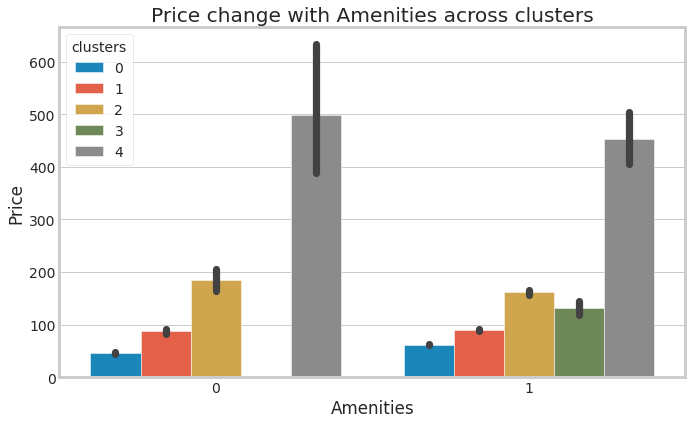

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(df['Amenities'], df['Price'], hue=df['clusters'])
plt.title('Price change with Amenities across clusters')
plt.show()

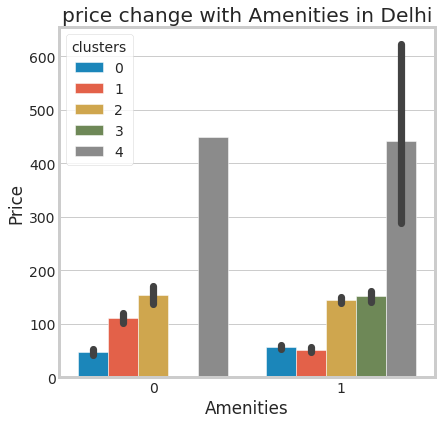

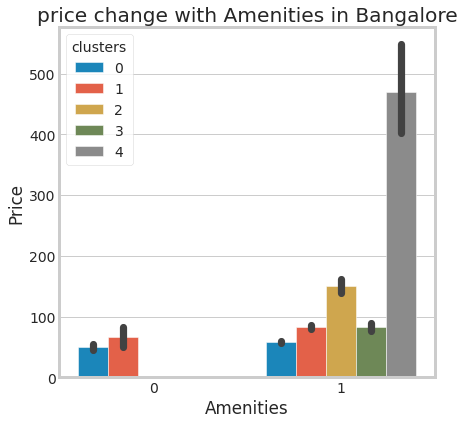

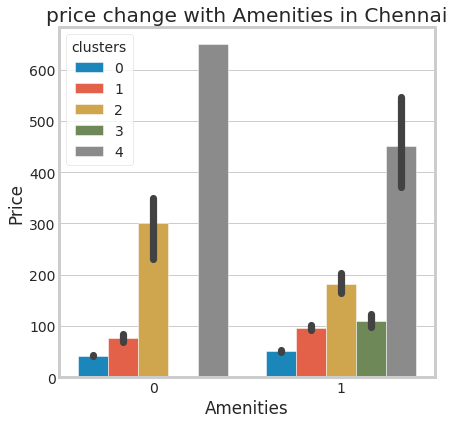

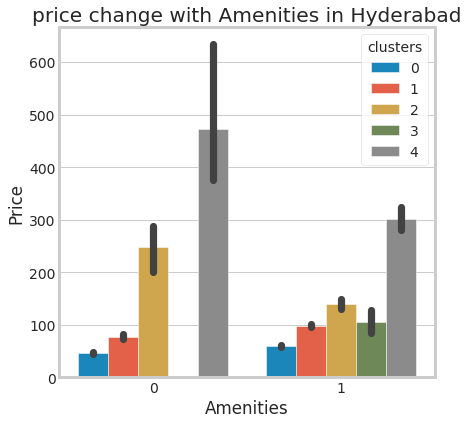

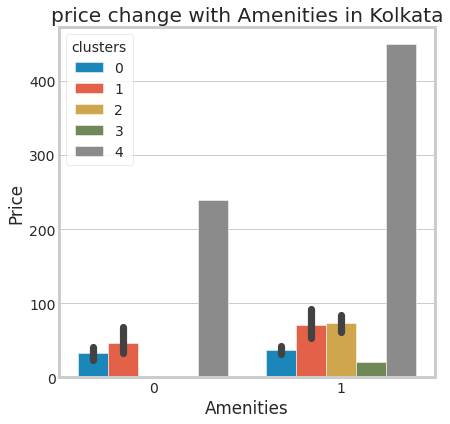

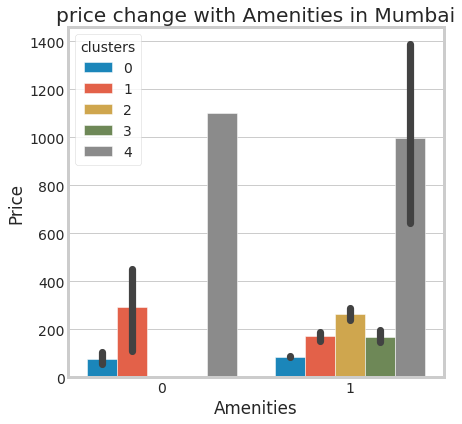

In [72]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='Amenities', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with Amenities in {i}")
  plt.show()

## Furnitioned

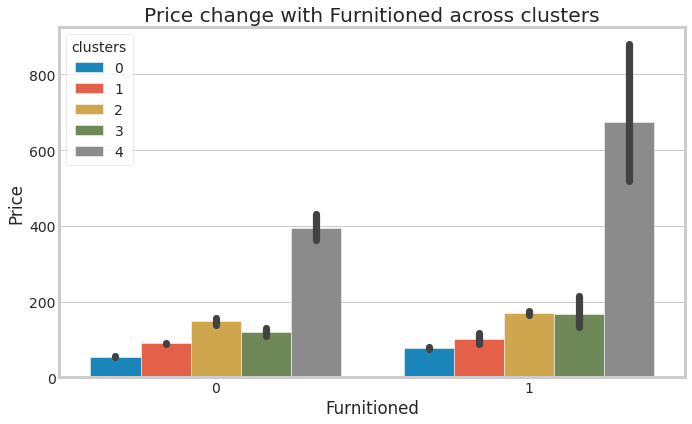

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(df['Furnitioned'], df['Price'], hue=df['clusters'])
plt.title('Price change with Furnitioned across clusters')
plt.show()

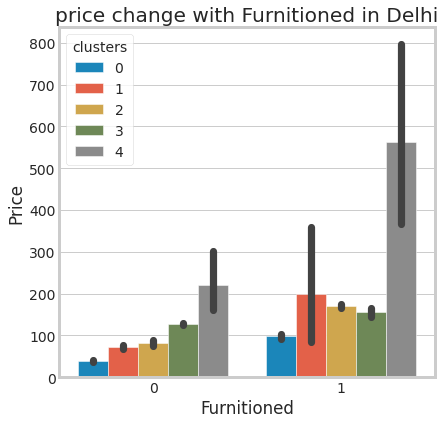

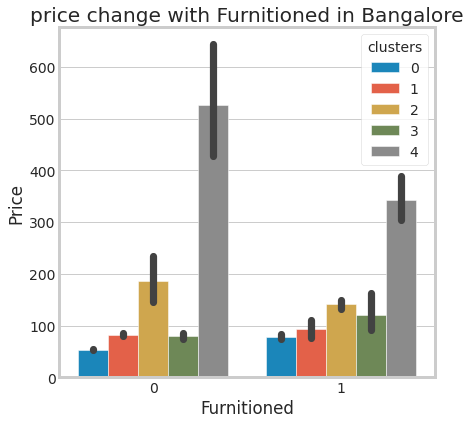

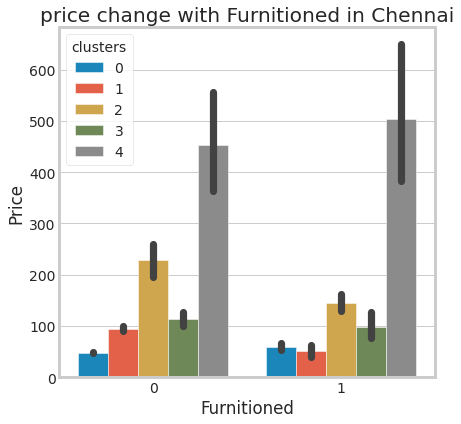

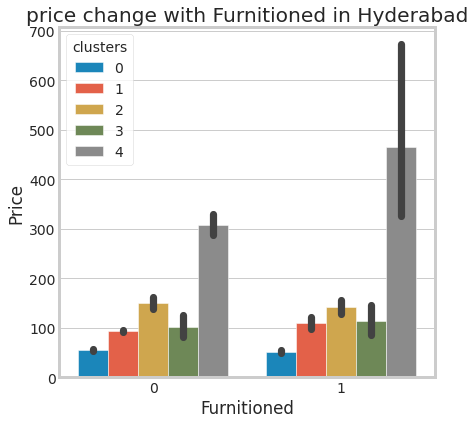

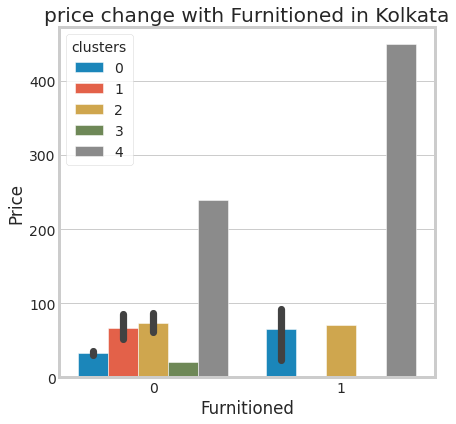

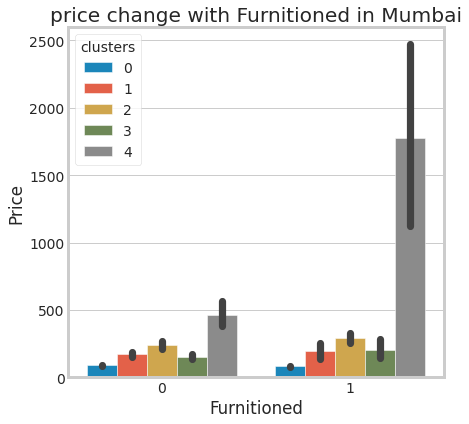

In [74]:
for i in city:  
  tmpdf = df[df['City'] == i]
  plt.figure(figsize=(6, 6))
  sns.barplot(x='Furnitioned', y='Price', hue=df['clusters'], data=tmpdf)
  plt.title(f"price change with Furnitioned in {i}")
  plt.show()